In [81]:
import numpy as np
import pandas as pd


In [82]:
df = pd.read_csv('D:/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# First check the Dataset  shape and the data types

In [83]:
df.shape

(25, 2)

In [84]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

# we will check is there any dubplicate values and null values present in the dataset

In [85]:
df.duplicated().sum()


0

In [86]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# We had seen that there is no duplicate values and no null values present in the dataset
* we will check how the Co-relation  between the feature and label

In [87]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [112]:
x = df.drop('Scores',axis = 1)
y = df[['Scores']]

In [113]:
print(x)
print(y)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
    Scores
0       21
1       47
2       27
3       75
4       30
5       20
6       88
7       60
8       81
9       25
10      85
11      62
12      41
13      42
14      17
15      95
16      30
17      24
18      67
19      69
20      30
21      54
22      35
23      76
24      86


In [127]:
# #Splitting training the train and test datasets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [128]:
print(xtest)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [129]:
#Importing the Linear regression model from scikit learn
from sklearn.linear_model import LinearRegression
Le =  LinearRegression()

In [130]:
# now we have to train the model by calling fit function 
Le.fit(xtrain,ytrain)

LinearRegression()

In [131]:
y_pred = Le.predict(xtest)

In [132]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(ytest, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18.943211722315272


In [133]:
r2_train = r2_score(ytest, y_pred)
print(r2_train)

0.9678055545167994


# Prediction Test

In [134]:
df.iloc[7]

Hours      5.5
Scores    60.0
Name: 7, dtype: float64

In [135]:
prediction = [[5.5]]
print(f'prediction result :{Le.predict(prediction).round()}')

prediction result :[[56.]]


C:\Users\mufas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


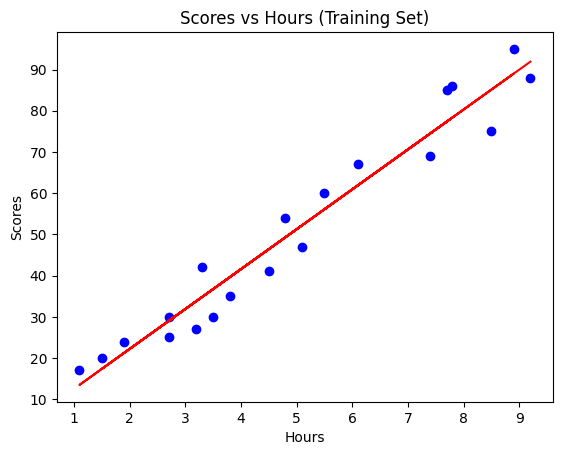

In [138]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain, color = 'blue')
plt.plot(xtrain , Le.predict(xtrain), color = 'red')
plt.title('Scores vs Hours (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

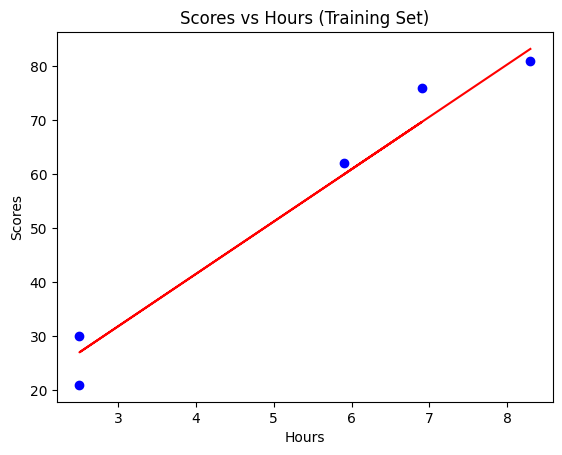

In [140]:
plt.scatter(xtest,ytest, color = 'blue')
plt.plot(xtest , Le.predict(xtest), color = 'red')
plt.title('Scores vs Hours (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()